# Version History

VERSION 0.2:
* Introduced the mode parameter to toggle between maximization and minimization.
* Added a lambda function, is_better, to abstract the comparison logic based on the mode.
* The best_score is now set based on the mode of operation.
* The fit method is updated to use the is_better function for comparison.



VERSION 0.1:
* Basic hill climbing functionality to maximize an objective function.
* The fit method only seeks to improve (maximize) the objective function score.
* The best_score is initialized to negative infinity to ensure any score is better.


# Hill Climber Class

In [1]:
cities = [
    (8, 31), (54, 97), (50, 50), (65, 16), (70, 47), (25, 100), (55, 74), (77, 87),
    (6, 46), (70, 78), (13, 38), (100, 32), (26, 35), (55, 16), (26, 77), (17, 67),
    (40, 36), (38, 27), (33, 2), (48, 9), (62, 20), (17, 92), (30, 2), (80, 75),
    (32, 36), (43, 79), (57, 49), (18, 24), (96, 76), (81, 39)
]

In [2]:
class HillClimber:
  def __init__(self, generate_neighbor,
              objective_function,
              initial_solution_generator,
              step_size=0.1,
              max_iter=1000,
              mode='max',
              num_restarts=10,
              ):
    self.generate_neighbor = generate_neighbor
    self.objective_function = objective_function
    self.initial_solution_generator = initial_solution_generator
    self.current_solution = initial_solution_generator()
    self.step_size = step_size
    self.max_iter = max_iter
    self.best_score = None
    self._setup_mode(mode)
    self.num_restarts = num_restarts
    self.first = lambda x: x[0]

  def _setup_mode(self, mode):
    self.best_score = float('-inf') if mode == 'max' else float('inf')
    if mode == 'max':
        self.is_better = lambda new, best: new > best
        self.best_score = float('-inf')
    else:
        self.is_better = lambda new, best: new < best
        self.best_score = float('inf')

  def fit(self):
    for _ in range(self.max_iter):
        new_solution = self.first(self.generate_neighbor(self.current_solution, self.step_size))
        new_score = self.objective_function(new_solution)

        if self.is_better(new_score, self.best_score):
            self.best_solution = new_solution
            self.best_score = new_score
            self.current_solution = new_solution

    return self.best_solution

  def predict(self):
      return self.best_solution

  def score(self):
      return self.best_score

# 0. Discrete Problem Test

In [3]:
import numpy as np

In [14]:
from math import sqrt
import random
       
def objective_function(new_solution):
    print("new_soulution", new_solution)
    distance=0
    for i in range(0, len(new_solution)-1):
        # if i!=0:x
        distance += pow(pow(new_solution[i][0]-new_solution[i+1][0],2)+pow(new_solution[i][1]-new_solution[i+1][1],2),0.5)
    print("distance", distance)
    return distance

def generate_neighbor(solution, step_size):
    neighbor = solution.copy()
    i, j = random.sample(range(len(neighbor)), 2)
    neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
    return neighbor, None


def initial_solution_generator():
    return cities


hc = HillClimber(
        generate_neighbor=generate_neighbor,
        objective_function=objective_function,
        initial_solution_generator=initial_solution_generator,
        mode='min'
)
hc.fit()
print(f"Hill Climber Best Solution: {hc.predict()}")
print(f"Hill Climber Best Score: {hc.score()}")


new_soulution [(8, 31), (54, 97), (50, 50), (65, 16), (70, 47), (25, 100), (55, 74), (77, 87), (6, 46), (33, 2), (13, 38), (100, 32), (26, 35), (55, 16), (26, 77), (17, 67), (40, 36), (38, 27), (70, 78), (48, 9), (62, 20), (17, 92), (30, 2), (80, 75), (32, 36), (43, 79), (57, 49), (18, 24), (96, 76), (81, 39)]
distance 1564.5960405024366
new_soulution [(8, 31), (54, 97), (57, 49), (65, 16), (70, 47), (25, 100), (55, 74), (77, 87), (6, 46), (33, 2), (13, 38), (100, 32), (26, 35), (55, 16), (26, 77), (17, 67), (40, 36), (38, 27), (70, 78), (48, 9), (62, 20), (17, 92), (30, 2), (80, 75), (32, 36), (43, 79), (50, 50), (18, 24), (96, 76), (81, 39)]
distance 1553.9469328428065
new_soulution [(8, 31), (40, 36), (57, 49), (65, 16), (70, 47), (25, 100), (55, 74), (77, 87), (6, 46), (33, 2), (13, 38), (100, 32), (26, 35), (55, 16), (26, 77), (17, 67), (54, 97), (38, 27), (70, 78), (48, 9), (62, 20), (17, 92), (30, 2), (80, 75), (32, 36), (43, 79), (50, 50), (18, 24), (96, 76), (81, 39)]
distance

# 1. FirstChoiceHillClimber

Given the base class HillClimber, implement a FirstChoiceHillClimber class that extends the functionality of hill climbing by selecting the first neighboring solution that is better than the current solution. Override the fit method to perform the hill climbing process, predict to return the best solution found, and score to return the objective value of the best solution.

In [5]:
class FirstChoiceHillClimber(HillClimber):
  pass

#2. SteepestAscentHillClimber


Using the provided HillClimber class, create a SteepestAscentHillClimber class that finds the best neighbor out of all possible neighbor solutions generated in one iteration and moves to it if it is better than the current solution. Implement fit, predict, and score methods according to the class' operations.

In [32]:
import numpy as np

scores = [10, 45, 26, 37, 59, 40, 1, 22222, 49]
print(scores[np.argmax(scores)])

22222


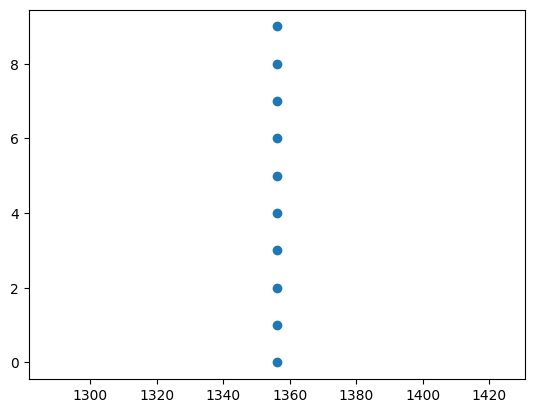

In [12]:
import numpy as np
from math import sqrt
import random
import matplotlib.pyplot as plt

class SteepestHillClimber(HillClimber):
    def fit(self):
        for _ in range(self.max_iter):
            new_solutions = self.generate_neighbor(self.current_solution, self.step_size) # 10 things
            new_scores = [self.objective_function(new_solution) for new_solution in new_solutions] # 10 things
            new_score = new_scores[np.argmin(new_scores)] # 1 thing

            if self.is_better(new_score, self.best_score):
                self.best_solution = new_solutions[np.argmin(new_score)]
                self.best_score = new_score
                self.current_solution = new_solutions[np.argmin(new_score)]

        return self.best_solution
    
cities = [
    (8, 31), (54, 97), (50, 50), (65, 16), (70, 47), (25, 100), (55, 74), (77, 87),
    (6, 46), (70, 78), (13, 38), (100, 32), (26, 35), (55, 16), (26, 77), (17, 67),
    (40, 36), (38, 27), (33, 2), (48, 9), (62, 20), (17, 92), (30, 2), (80, 75),
    (32, 36), (43, 79), (57, 49), (18, 24), (96, 76), (81, 39)
]


def generate_neighbor(solution, step_size):
    solutions = []
    for k in range(10):
        neighbor = solution.copy()
        i, j = random.sample(range(len(neighbor)), 2)
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        solutions.append(neighbor)
    return solutions


def initial_solution_generator():
    return cities

def objective_function(new_solution):
    # print("new_soulution", new_solution)
    distance=0
    for i in range(0, len(new_solution)-1):
        # if i!=0:
        distance += pow(pow(new_solution[i][0]-new_solution[i+1][0],2)+pow(new_solution[i][1]-new_solution[i+1][1],2),0.5)
    # print("distance", distance)
    return distance



hc = SteepestHillClimber(
        generate_neighbor=generate_neighbor,
        objective_function=objective_function,
        initial_solution_generator=initial_solution_generator,
        mode='min'
)

results = []
y = np.array(range(0, 10))
for i in range(10):
    hc.fit()
    results.append(int(hc.score()))
# hc.fit()

# print(f"Hill Climber Best Solution: {hc.predict()}")
# print(f"Hill Climber Best Score: {hc.score()}")

plt.scatter(results, y)
plt.show()

# 3. RandomRestartHillClimber

Design a RandomRestartHillClimber class that uses the HillClimber class as a base. This class should perform hill climbing multiple times with randomly generated starting solutions and keep track of the best solution found across all restarts. Make sure to define fit, predict, and score methods for the class functionality.

# Evaluation Functions



| Ackley | Griewank | Convex |
|------|----------|-----|
| <img src="https://drive.google.com/uc?id=1M1slit0Toi9fSt5A_XFPLHdC73vue9-_" width="400"/>   | <img src="https://drive.google.com/uc?id=1dz2iCffrUXVa7bB4ohxjvDXPp3ud0vTO" width="400"/>      |   <img src="https://drive.google.com/uc?id=1FRXc3t5WQlKRWHT_sj7xfhocITK3-RoW" width="400"/>  |

```
def ackley_function(x):
    term1 = -20 * math.exp(-0.2 * math.sqrt(sum(xi ** 2 for xi in x) / len(x)))
    term2 = -math.exp(sum(math.cos(2 * math.pi * xi) for xi in x) / len(x))
    return 20 + math.e + term1 + term2

def convex_function(x):
    return (x[0] - 2) ** 2 + 5 * (x[1] - 5) ** 2 + 8 * (x[2] + 8) ** 2 + 3 * (x[3] + 1) ** 2 + 6 * (x[4] - 7) ** 2

def griewank_function(x):
    sum_term = sum(xi ** 2 for xi in x) / 4000
    prod_term = math.cos(x[0])
    for i, xi in enumerate(x[1:], start=2):
        prod_term *= math.cos(xi / math.sqrt(i))
    return 1 + sum_term - prod_term
```



#4. Continuous Problem Test

FirstChoiceHillClimber and SteepestAscentHillClimber classes using the ackley_function as the objective function. We will test these classes to see if they can minimize this function, starting from a random initial solution in a 5-dimensional space.

```
def convex_function(x):
    return (x[0] - 2) ** 2 + 5 * (x[1] - 5) ** 2 + 8 * (x[2] + 8) ** 2 + 3 * (x[3] + 1) ** 2 + 6 * (x[4] - 7) ** 2
```

In [ ]:
import numpy as np

def convex_function(x):
    return (x[0] - 2) ** 2 + 5 * (x[1] - 5) ** 2 + 8 * (x[2] + 8) ** 2 + 3 * (x[3] + 1) ** 2 + 6 * (x[4] - 7) ** 2

def initial_solution(n=5):
    return [np.random.uniform(-30, 30) for _ in range(n)]

def generate_neighbor(solution, step_size):
  """
  Generates a neighboring solution for a given continuous optimization problem.

  Parameters:
  - solution (numpy.ndarray): The current solution vector from which neighbors will be generated.
  - step_size (float): The magnitude of the maximum change that can be applied to each component of the solution. Defines the neighborhood range.

  Returns:
    neighbors (list of numpy.ndarray): A list of neighboring solutions.

  Examples:
    current_solution = np.array([1.0, 1.5, -2.0, 0.5, 3.0])
    neighbor = generate_neighbors(current_solution, 0.1)
  """
  return [[solution[i] + np.random.uniform(-step_size, step_size) for i in range(len(solution))]]

# Test the FirstChoiceHillClimber class
first_choice_hill_climber = FirstChoiceHillClimber(
    generate_neighbor=generate_neighbor,
    objective_function=convex_function,
    initial_solution_generator=initial_solution,
    step_size=0.1,
    max_iter=100000,
    mode='min'
)

first_choice_hill_climber.fit()
print(f"First Choice Hill Climber Best Solution: {first_choice_hill_climber.predict()}")
print(f"First Choice Hill Climber Best Score: {first_choice_hill_climber.score()}")

First Choice Hill Climber Best Solution: [-2.744348523383657, 7.330369422581427, -7.979925666894111, 2.680125663078684, 5.218540351455864]
First Choice Hill Climber Best Score: 109.33674053513926


In [ ]:
help(generate_neighbor)

Help on function generate_neighbor in module __main__:

generate_neighbor(solution, step_size)
    Generates a neighboring solution for a given continuous optimization problem. 
    
    Parameters
    - solution (numpy.ndarray): The current solution vector from which neighbors will be generated.
    - step_size (float): The magnitude of the maximum change that can be applied to each component of the solution. Defines the neighborhood range.
    
    Returns
      neighbors (list of numpy.ndarray): A list of neighboring solutions.
    
    Examples
      current_solution = np.array([1.0, 1.5, -2.0, 0.5, 3.0])
      neighbor = generate_neighbors(current_solution, 0.1)
